# Neural Networks

Neural networks are a subset of machine learning algorithms inspired by the structure and function of the human brain. They consist of interconnected layers of nodes (neurons) that process data by passing it through weights, biases, and activation functions.

## Key Components
1. **Neurons (Nodes)**: Basic computational units that receive input, apply a weight and bias, and pass it through an activation function.
2. **Layers**:
   - **Input Layer**: Receives the raw data.
   - **Hidden Layers**: Perform computations, enabling the network to learn complex patterns.
   - **Output Layer**: Produces the final result.
3. **Weights and Biases**: Parameters adjusted during training to minimize error.
4. **Activation Functions**: Introduce non-linearity, allowing the network to learn more complex mappings (e.g., ReLU, sigmoid, tanh).

## Types of Neural Networks
1. **Feedforward Neural Networks (FNN)**: Data flows in one direction, often used for tasks like classification and regression.
2. **Convolutional Neural Networks (CNNs)**: Specialized for image data, using convolution layers to extract features.
3. **Recurrent Neural Networks (RNNs)**: Designed for sequential data (e.g., time series, text), using loops to retain memory of previous inputs.
4. **Generative Adversarial Networks (GANs)**: Consist of two networks (generator and discriminator) that compete to generate realistic data.
5. **Transformers**: Modern architectures (e.g., GPT, BERT) for sequence processing, replacing RNNs in many applications.

## Applications
- **Manufacturing**: Predictive maintenance, quality control, demand forecasting.
- **Healthcare**: Disease diagnosis, drug discovery.
- **Finance**: Fraud detection, algorithmic trading.
- **Natural Language Processing (NLP)**: Chatbots, translation, sentiment analysis.
- **Image Processing**: Object detection, facial recognition.

## Training a Neural Network
1. **Forward Propagation**: Compute the output for a given input.
2. **Loss Function**: Measure the difference between the predicted output and the actual target.
3. **Backward Propagation**: Adjust weights and biases using gradient descent to minimize the loss.
4. **Optimization**: Algorithms like stochastic gradient descent (SGD), Adam, or RMSprop refine the model.

## Challenges
- **Overfitting**: The network performs well on training data but poorly on unseen data.
- **Data Requirements**: Neural networks often require large datasets.
- **Computation**: Training deep networks can be resource-intensive.

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


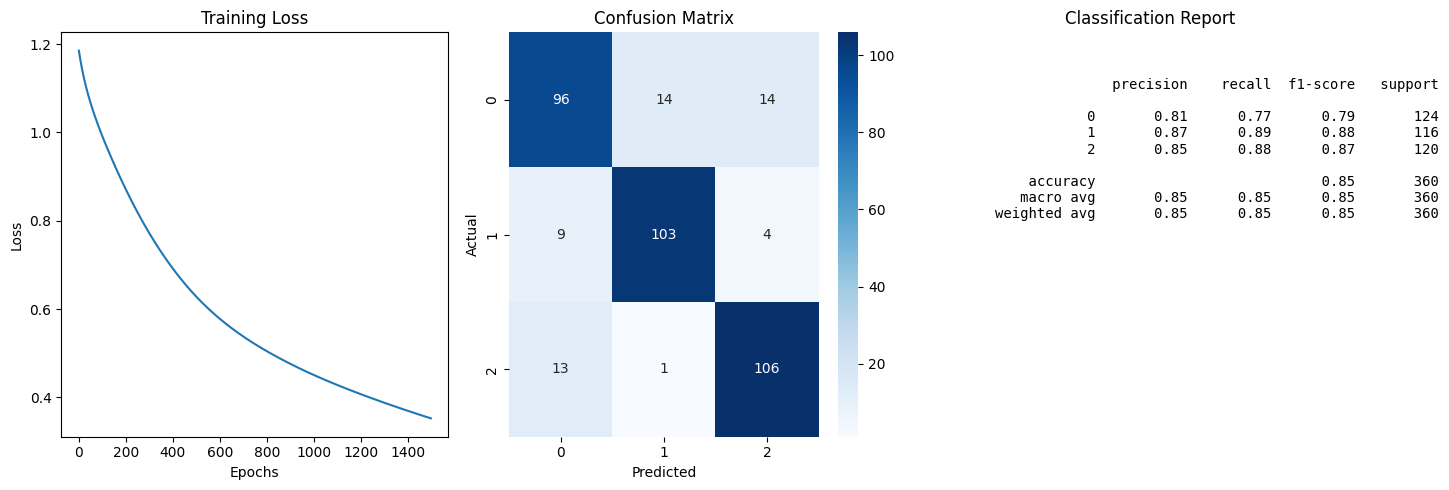

Overall Accuracy: 84.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       124
           1       0.87      0.89      0.88       116
           2       0.85      0.88      0.87       120

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [1]:
class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01, epochs=1000):
        """
        Initialize neural network with specified layer architecture
        
        Parameters:
        - layers: List of integers representing number of neurons in each layer
        - learning_rate: Step size for weight updates
        - epochs: Number of training iterations
        """
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.biases = []
        
        # Xavier initialization for weights
        for i in range(len(layers) - 1):
            limit = np.sqrt(6 / (layers[i] + layers[i+1]))
            self.weights.append(np.random.uniform(-limit, limit, (layers[i], layers[i+1])))
            self.biases.append(np.zeros((1, layers[i+1])))
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of ReLU activation"""
        return x > 0
    
    def softmax(self, x):
        """Softmax activation for output layer"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward_propagation(self, X):
        """Perform forward propagation through the network"""
        self.layer_outputs = [X]
        
        for i in range(len(self.layers) - 1):
            Z = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            A = self.relu(Z) if i < len(self.layers) - 2 else self.softmax(Z)
            self.layer_outputs.append(A)
        
        return self.layer_outputs[-1]
    
    def backward_propagation(self, X, y):
        """Perform backpropagation to compute gradients"""
        m = X.shape[0]
        output = self.layer_outputs[-1]
        dZ = output - y
        
        gradients_weights = []
        gradients_biases = []
        
        for i in range(len(self.layers) - 1, 0, -1):
            dW = (1/m) * np.dot(self.layer_outputs[i-1].T, dZ)
            db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
            gradients_weights.insert(0, dW)
            gradients_biases.insert(0, db)

            if i > 1:
                dZ = np.dot(dZ, self.weights[i-1].T) * self.relu_derivative(self.layer_outputs[i-1])
        
        return gradients_weights, gradients_biases
    
    def train(self, X, y):
        """Train the neural network"""
        y_one_hot = np.eye(self.layers[-1])[y]
        self.training_loss = []

        for epoch in range(self.epochs):
            output = self.forward_propagation(X)
            loss = -np.mean(np.sum(y_one_hot * np.log(output + 1e-15), axis=1))
            self.training_loss.append(loss)
            gradients_weights, gradients_biases = self.backward_propagation(X, y_one_hot)

            for i in range(len(self.layers) - 1):
                self.weights[i] -= self.learning_rate * gradients_weights[i]
                self.biases[i] -= self.learning_rate * gradients_biases[i]
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        output = self.forward_propagation(X)
        return np.argmax(output, axis=1)

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, 
                           n_informative=10, random_state=42, weights=[0.6, 0.3, 0.1])

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network
nn = NeuralNetwork(layers=[20, 64, 32, 3], learning_rate=0.01, epochs=1500)
nn.train(X_train_scaled, y_train)

# Make predictions
y_pred = nn.predict(X_test_scaled)

# Visualization and Metrics
plt.figure(figsize=(15, 5))

# 1. Training Loss Plot
plt.subplot(131)
plt.plot(nn.training_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# 2. Confusion Matrix
plt.subplot(132)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. Classification Report
plt.subplot(133)
plt.text(0.1, 0.5, classification_report(y_test, y_pred), 
         fontsize=10, family='monospace')
plt.title('Classification Report')
plt.axis('off')

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)

plt.tight_layout()
plt.show()

print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
